In [1]:
import torch

写一个单变量的线性拟合函数，并计算梯度和更新梯度

In [4]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [5]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [6]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [7]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)
    return squared_diffs.mean()

In [8]:
w = torch.ones(1)
b = torch.zeros(1)
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [9]:
loss = loss_fn(t_p, t_c)

In [10]:
loss

tensor(41.3000)

In [11]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c)) - loss_fn(model(t_u, w - delta, b), t_c) / (2.0 * delta)

In [12]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [14]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b -= learning_rate * loss_rate_of_change_b

In [15]:
b

tensor([-0.0100])

In [16]:
w

tensor([2.3412])

In [17]:
t_p = model(t_u, w, b)
loss = loss_fn(t_p, t_c)
loss

tensor(110.7642)

In [18]:
from torch import nn
loss = nn.MSELoss()
input = torch.randn(10, 5, requires_grad=True)
target = torch.randn(10, 5)
output = loss(input, target)
output.backward()

In [19]:
output

tensor(2.1481, grad_fn=<MseLossBackward>)

In [20]:
input

tensor([[ 0.7513,  0.2802,  0.1399, -0.1537, -0.1237],
        [ 1.7391,  2.2769,  0.3107,  0.0113, -0.1695],
        [-0.2660, -0.1120, -0.5163, -0.8460,  0.3239],
        [-0.2153, -0.9430,  0.7364, -0.5329,  0.1427],
        [-1.1676, -1.5663,  0.5127, -0.0689,  0.2214],
        [ 0.4472, -2.1059, -0.4373,  2.2440,  1.0268],
        [ 1.4176,  0.9049,  0.3156,  1.3258,  0.5844],
        [-0.7853, -0.0619, -0.2538, -1.4168, -0.6995],
        [ 1.1145,  2.1038, -0.9562,  1.9443,  0.6870],
        [ 2.1331, -0.6445, -0.4223, -1.1196,  0.1770]], requires_grad=True)

In [21]:
target

tensor([[ 1.0324,  1.1219, -1.7117, -0.4830, -0.8116],
        [ 1.6033, -0.0265,  0.3215,  0.3520,  1.0852],
        [-0.8752,  1.0892, -0.3392, -1.0594, -0.1102],
        [-0.2469,  2.2642,  1.6204,  1.2858, -1.3042],
        [ 0.2685,  1.1026,  0.6463,  1.7054,  0.3682],
        [-0.2703, -0.8147,  1.5121,  0.3422,  0.2404],
        [ 0.5701, -0.2586,  2.0323, -0.4705,  0.9056],
        [-1.4115,  0.9923,  0.6937, -0.0079,  1.9190],
        [ 1.0284, -1.0863, -0.6339, -1.5770,  1.1048],
        [-0.1870,  0.9314,  0.6114, -0.5129, -1.4651]])

In [26]:
# 定义损失函数，L = 2(f(xi) - yi)
def dloss_fn(t_p, t_c):
    dsg_diffs = 2 * (t_p - t_c)
    return dsg_diffs

# 定义拟合函数
def model(t_u, w, b):
    return w * t_u + b

# 求参数w的偏导
def dmodel_dw(t_u, w, b):
    return t_u

# 求参数b的偏导
def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

In [28]:
params = torch.tensor([1.0, 0.0])
n_epochs = 100
learning_rate = 1e-2
for epoch in range(n_epochs):
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    grad = grad_fn(t_u, t_c, t_p, w, b)
    print('Params: ', params)
    print('Grad: ', grad)
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 41.299999
Params:  tensor([1., 0.])
Grad:  tensor([4517.2964,   82.6000])
Epoch 1, Loss -2299.485352
Params:  tensor([-44.1730,  -0.8260])
Grad:  tensor([-261257.4062,   -4598.9707])
Epoch 2, Loss 133077.859375
Params:  tensor([2568.4011,   45.1637])
Grad:  tensor([15109615.0000,   266155.7188])
Epoch 3, Loss -7696363.500000
Params:  tensor([-148527.7344,   -2616.3933])
Grad:  tensor([-8.7385e+08, -1.5393e+07])
Epoch 4, Loss 445113152.000000
Params:  tensor([8589997.0000,  151310.8750])
Grad:  tensor([5.0539e+10, 8.9023e+08])
Epoch 5, Loss -25742770176.000000
Params:  tensor([-4.9680e+08, -8.7510e+06])
Grad:  tensor([-2.9229e+12, -5.1486e+10])
Epoch 6, Loss 1488812769280.000000
Params:  tensor([2.8732e+10, 5.0610e+08])
Grad:  tensor([1.6904e+14, 2.9776e+12])
Epoch 7, Loss -86104304779264.000000
Params:  tensor([-1.6617e+12, -2.9270e+10])
Grad:  tensor([-9.7764e+15, -1.7221e+14])
Epoch 8, Loss 4979775135285248.000000
Params:  tensor([9.6102e+13, 1.6928e+12])
Grad:  tensor(

tensor([nan, nan])

In [29]:
params = torch.tensor([1.0, 0.0])
n_epochs = 100
learning_rate = 1e-4
for epoch in range(n_epochs):
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    grad = grad_fn(t_u, t_c, t_p, w, b)
    print('Params: ', params)
    print('Grad: ', grad)
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 41.299999
Params:  tensor([1., 0.])
Grad:  tensor([4517.2964,   82.6000])
Epoch 1, Loss 17.892145
Params:  tensor([ 0.5483, -0.0083])
Grad:  tensor([1859.5493,   35.7843])
Epoch 2, Loss 8.256101
Params:  tensor([ 0.3623, -0.0118])
Grad:  tensor([765.4666,  16.5122])
Epoch 3, Loss 4.289331
Params:  tensor([ 0.2858, -0.0135])
Grad:  tensor([315.0790,   8.5787])
Epoch 4, Loss 2.656365
Params:  tensor([ 0.2543, -0.0143])
Grad:  tensor([129.6733,   5.3127])
Epoch 5, Loss 1.984125
Params:  tensor([ 0.2413, -0.0149])
Grad:  tensor([53.3496,  3.9682])
Epoch 6, Loss 1.707377
Params:  tensor([ 0.2360, -0.0153])
Grad:  tensor([21.9304,  3.4148])
Epoch 7, Loss 1.593436
Params:  tensor([ 0.2338, -0.0156])
Grad:  tensor([8.9964, 3.1869])
Epoch 8, Loss 1.546516
Params:  tensor([ 0.2329, -0.0159])
Grad:  tensor([3.6721, 3.0930])
Epoch 9, Loss 1.527186
Params:  tensor([ 0.2325, -0.0162])
Grad:  tensor([1.4803, 3.0544])
Epoch 10, Loss 1.519213
Params:  tensor([ 0.2324, -0.0166])
Grad:  ten

tensor([ 0.2327, -0.0438])

In [30]:
params = torch.tensor([1.0, 0.0])
n_epochs = 200
learning_rate = 1e-4
for epoch in range(n_epochs):
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    grad = grad_fn(t_u, t_c, t_p, w, b)
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 41.299999
Epoch 1, Loss 17.892145
Epoch 2, Loss 8.256101
Epoch 3, Loss 4.289331
Epoch 4, Loss 2.656365
Epoch 5, Loss 1.984125
Epoch 6, Loss 1.707377
Epoch 7, Loss 1.593436
Epoch 8, Loss 1.546516
Epoch 9, Loss 1.527186
Epoch 10, Loss 1.519213
Epoch 11, Loss 1.515914
Epoch 12, Loss 1.514542
Epoch 13, Loss 1.513960
Epoch 14, Loss 1.513705
Epoch 15, Loss 1.513585
Epoch 16, Loss 1.513520
Epoch 17, Loss 1.513478
Epoch 18, Loss 1.513444
Epoch 19, Loss 1.513415
Epoch 20, Loss 1.513387
Epoch 21, Loss 1.513361
Epoch 22, Loss 1.513334
Epoch 23, Loss 1.513308
Epoch 24, Loss 1.513281
Epoch 25, Loss 1.513255
Epoch 26, Loss 1.513228
Epoch 27, Loss 1.513202
Epoch 28, Loss 1.513175
Epoch 29, Loss 1.513148
Epoch 30, Loss 1.513123
Epoch 31, Loss 1.513095
Epoch 32, Loss 1.513069
Epoch 33, Loss 1.513043
Epoch 34, Loss 1.513016
Epoch 35, Loss 1.512989
Epoch 36, Loss 1.512963
Epoch 37, Loss 1.512937
Epoch 38, Loss 1.512909
Epoch 39, Loss 1.512883
Epoch 40, Loss 1.512857
Epoch 41, Loss 1.512831


tensor([ 0.2333, -0.0740])

In [33]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c) ** 2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)
params.grad is None

True

In [34]:
loss.backward()

In [35]:
params.grad

tensor([4517.2969,   82.6000])

In [37]:
# 重置参数
if params.grad is not None:
    params.grad.zero_()

In [42]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
n_epochs = 10000
learning_rate = 1e-4
for epoch in range(n_epochs):
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    if params.grad is not None:
        params.grad.zero()
    loss.backward()
    params = (params - learning_rate * params.grad).detach().requires_grad_()
    
    
params

Epoch 0, Loss 1763.884644
Epoch 1, Loss 323.090546
Epoch 2, Loss 78.929634
Epoch 3, Loss 37.552845
Epoch 4, Loss 30.540285
Epoch 5, Loss 29.351152
Epoch 6, Loss 29.148882
Epoch 7, Loss 29.113848
Epoch 8, Loss 29.107145
Epoch 9, Loss 29.105242
Epoch 10, Loss 29.104168
Epoch 11, Loss 29.103222
Epoch 12, Loss 29.102297
Epoch 13, Loss 29.101379
Epoch 14, Loss 29.100466
Epoch 15, Loss 29.099548
Epoch 16, Loss 29.098631
Epoch 17, Loss 29.097715
Epoch 18, Loss 29.096796
Epoch 19, Loss 29.095884
Epoch 20, Loss 29.094959
Epoch 21, Loss 29.094049
Epoch 22, Loss 29.093134
Epoch 23, Loss 29.092213
Epoch 24, Loss 29.091297
Epoch 25, Loss 29.090382
Epoch 26, Loss 29.089466
Epoch 27, Loss 29.088551
Epoch 28, Loss 29.087635
Epoch 29, Loss 29.086718
Epoch 30, Loss 29.085808
Epoch 31, Loss 29.084888
Epoch 32, Loss 29.083965
Epoch 33, Loss 29.083057
Epoch 34, Loss 29.082142
Epoch 35, Loss 29.081219
Epoch 36, Loss 29.080309
Epoch 37, Loss 29.079393
Epoch 38, Loss 29.078474
Epoch 39, Loss 29.077559
Epoch 4

Epoch 615, Loss 28.555334
Epoch 616, Loss 28.554438
Epoch 617, Loss 28.553545
Epoch 618, Loss 28.552637
Epoch 619, Loss 28.551741
Epoch 620, Loss 28.550848
Epoch 621, Loss 28.549946
Epoch 622, Loss 28.549049
Epoch 623, Loss 28.548155
Epoch 624, Loss 28.547258
Epoch 625, Loss 28.546362
Epoch 626, Loss 28.545460
Epoch 627, Loss 28.544567
Epoch 628, Loss 28.543669
Epoch 629, Loss 28.542774
Epoch 630, Loss 28.541872
Epoch 631, Loss 28.540977
Epoch 632, Loss 28.540077
Epoch 633, Loss 28.539183
Epoch 634, Loss 28.538282
Epoch 635, Loss 28.537386
Epoch 636, Loss 28.536488
Epoch 637, Loss 28.535597
Epoch 638, Loss 28.534697
Epoch 639, Loss 28.533802
Epoch 640, Loss 28.532900
Epoch 641, Loss 28.532011
Epoch 642, Loss 28.531111
Epoch 643, Loss 28.530214
Epoch 644, Loss 28.529320
Epoch 645, Loss 28.528425
Epoch 646, Loss 28.527527
Epoch 647, Loss 28.526630
Epoch 648, Loss 28.525738
Epoch 649, Loss 28.524836
Epoch 650, Loss 28.523939
Epoch 651, Loss 28.523046
Epoch 652, Loss 28.522142
Epoch 653, L

Epoch 1232, Loss 28.007500
Epoch 1233, Loss 28.006620
Epoch 1234, Loss 28.005739
Epoch 1235, Loss 28.004860
Epoch 1236, Loss 28.003984
Epoch 1237, Loss 28.003111
Epoch 1238, Loss 28.002228
Epoch 1239, Loss 28.001348
Epoch 1240, Loss 28.000477
Epoch 1241, Loss 27.999598
Epoch 1242, Loss 27.998716
Epoch 1243, Loss 27.997841
Epoch 1244, Loss 27.996960
Epoch 1245, Loss 27.996080
Epoch 1246, Loss 27.995203
Epoch 1247, Loss 27.994326
Epoch 1248, Loss 27.993446
Epoch 1249, Loss 27.992567
Epoch 1250, Loss 27.991693
Epoch 1251, Loss 27.990814
Epoch 1252, Loss 27.989935
Epoch 1253, Loss 27.989063
Epoch 1254, Loss 27.988182
Epoch 1255, Loss 27.987303
Epoch 1256, Loss 27.986427
Epoch 1257, Loss 27.985546
Epoch 1258, Loss 27.984674
Epoch 1259, Loss 27.983793
Epoch 1260, Loss 27.982916
Epoch 1261, Loss 27.982038
Epoch 1262, Loss 27.981159
Epoch 1263, Loss 27.980284
Epoch 1264, Loss 27.979408
Epoch 1265, Loss 27.978529
Epoch 1266, Loss 27.977650
Epoch 1267, Loss 27.976774
Epoch 1268, Loss 27.975897
E

Epoch 1793, Loss 27.519554
Epoch 1794, Loss 27.518688
Epoch 1795, Loss 27.517830
Epoch 1796, Loss 27.516973
Epoch 1797, Loss 27.516108
Epoch 1798, Loss 27.515257
Epoch 1799, Loss 27.514385
Epoch 1800, Loss 27.513531
Epoch 1801, Loss 27.512667
Epoch 1802, Loss 27.511808
Epoch 1803, Loss 27.510944
Epoch 1804, Loss 27.510078
Epoch 1805, Loss 27.509218
Epoch 1806, Loss 27.508362
Epoch 1807, Loss 27.507502
Epoch 1808, Loss 27.506641
Epoch 1809, Loss 27.505785
Epoch 1810, Loss 27.504921
Epoch 1811, Loss 27.504057
Epoch 1812, Loss 27.503199
Epoch 1813, Loss 27.502342
Epoch 1814, Loss 27.501482
Epoch 1815, Loss 27.500612
Epoch 1816, Loss 27.499758
Epoch 1817, Loss 27.498896
Epoch 1818, Loss 27.498039
Epoch 1819, Loss 27.497169
Epoch 1820, Loss 27.496315
Epoch 1821, Loss 27.495451
Epoch 1822, Loss 27.494593
Epoch 1823, Loss 27.493731
Epoch 1824, Loss 27.492870
Epoch 1825, Loss 27.492010
Epoch 1826, Loss 27.491152
Epoch 1827, Loss 27.490290
Epoch 1828, Loss 27.489429
Epoch 1829, Loss 27.488569
E

Epoch 2384, Loss 27.015783
Epoch 2385, Loss 27.014946
Epoch 2386, Loss 27.014101
Epoch 2387, Loss 27.013258
Epoch 2388, Loss 27.012407
Epoch 2389, Loss 27.011572
Epoch 2390, Loss 27.010723
Epoch 2391, Loss 27.009880
Epoch 2392, Loss 27.009033
Epoch 2393, Loss 27.008192
Epoch 2394, Loss 27.007355
Epoch 2395, Loss 27.006508
Epoch 2396, Loss 27.005669
Epoch 2397, Loss 27.004820
Epoch 2398, Loss 27.003981
Epoch 2399, Loss 27.003136
Epoch 2400, Loss 27.002295
Epoch 2401, Loss 27.001448
Epoch 2402, Loss 27.000599
Epoch 2403, Loss 26.999767
Epoch 2404, Loss 26.998924
Epoch 2405, Loss 26.998075
Epoch 2406, Loss 26.997234
Epoch 2407, Loss 26.996387
Epoch 2408, Loss 26.995552
Epoch 2409, Loss 26.994703
Epoch 2410, Loss 26.993860
Epoch 2411, Loss 26.993019
Epoch 2412, Loss 26.992174
Epoch 2413, Loss 26.991335
Epoch 2414, Loss 26.990490
Epoch 2415, Loss 26.989649
Epoch 2416, Loss 26.988808
Epoch 2417, Loss 26.987959
Epoch 2418, Loss 26.987122
Epoch 2419, Loss 26.986280
Epoch 2420, Loss 26.985435
E

Epoch 2970, Loss 26.526466
Epoch 2971, Loss 26.525646
Epoch 2972, Loss 26.524817
Epoch 2973, Loss 26.523987
Epoch 2974, Loss 26.523163
Epoch 2975, Loss 26.522341
Epoch 2976, Loss 26.521513
Epoch 2977, Loss 26.520685
Epoch 2978, Loss 26.519859
Epoch 2979, Loss 26.519032
Epoch 2980, Loss 26.518206
Epoch 2981, Loss 26.517378
Epoch 2982, Loss 26.516558
Epoch 2983, Loss 26.515728
Epoch 2984, Loss 26.514900
Epoch 2985, Loss 26.514076
Epoch 2986, Loss 26.513252
Epoch 2987, Loss 26.512426
Epoch 2988, Loss 26.511597
Epoch 2989, Loss 26.510771
Epoch 2990, Loss 26.509943
Epoch 2991, Loss 26.509117
Epoch 2992, Loss 26.508295
Epoch 2993, Loss 26.507471
Epoch 2994, Loss 26.506639
Epoch 2995, Loss 26.505816
Epoch 2996, Loss 26.504992
Epoch 2997, Loss 26.504158
Epoch 2998, Loss 26.503338
Epoch 2999, Loss 26.502516
Epoch 3000, Loss 26.501684
Epoch 3001, Loss 26.500862
Epoch 3002, Loss 26.500031
Epoch 3003, Loss 26.499212
Epoch 3004, Loss 26.498388
Epoch 3005, Loss 26.497559
Epoch 3006, Loss 26.496735
E

Epoch 3547, Loss 26.054382
Epoch 3548, Loss 26.053570
Epoch 3549, Loss 26.052763
Epoch 3550, Loss 26.051949
Epoch 3551, Loss 26.051136
Epoch 3552, Loss 26.050331
Epoch 3553, Loss 26.049519
Epoch 3554, Loss 26.048706
Epoch 3555, Loss 26.047901
Epoch 3556, Loss 26.047089
Epoch 3557, Loss 26.046278
Epoch 3558, Loss 26.045473
Epoch 3559, Loss 26.044661
Epoch 3560, Loss 26.043854
Epoch 3561, Loss 26.043047
Epoch 3562, Loss 26.042231
Epoch 3563, Loss 26.041424
Epoch 3564, Loss 26.040613
Epoch 3565, Loss 26.039808
Epoch 3566, Loss 26.038996
Epoch 3567, Loss 26.038183
Epoch 3568, Loss 26.037382
Epoch 3569, Loss 26.036568
Epoch 3570, Loss 26.035755
Epoch 3571, Loss 26.034945
Epoch 3572, Loss 26.034143
Epoch 3573, Loss 26.033333
Epoch 3574, Loss 26.032524
Epoch 3575, Loss 26.031710
Epoch 3576, Loss 26.030903
Epoch 3577, Loss 26.030096
Epoch 3578, Loss 26.029280
Epoch 3579, Loss 26.028475
Epoch 3580, Loss 26.027662
Epoch 3581, Loss 26.026857
Epoch 3582, Loss 26.026043
Epoch 3583, Loss 26.025238
E

Epoch 4160, Loss 25.563173
Epoch 4161, Loss 25.562384
Epoch 4162, Loss 25.561586
Epoch 4163, Loss 25.560793
Epoch 4164, Loss 25.560005
Epoch 4165, Loss 25.559212
Epoch 4166, Loss 25.558416
Epoch 4167, Loss 25.557629
Epoch 4168, Loss 25.556831
Epoch 4169, Loss 25.556042
Epoch 4170, Loss 25.555250
Epoch 4171, Loss 25.554455
Epoch 4172, Loss 25.553661
Epoch 4173, Loss 25.552870
Epoch 4174, Loss 25.552082
Epoch 4175, Loss 25.551283
Epoch 4176, Loss 25.550499
Epoch 4177, Loss 25.549702
Epoch 4178, Loss 25.548912
Epoch 4179, Loss 25.548113
Epoch 4180, Loss 25.547325
Epoch 4181, Loss 25.546537
Epoch 4182, Loss 25.545744
Epoch 4183, Loss 25.544950
Epoch 4184, Loss 25.544157
Epoch 4185, Loss 25.543365
Epoch 4186, Loss 25.542574
Epoch 4187, Loss 25.541780
Epoch 4188, Loss 25.540987
Epoch 4189, Loss 25.540197
Epoch 4190, Loss 25.539404
Epoch 4191, Loss 25.538622
Epoch 4192, Loss 25.537819
Epoch 4193, Loss 25.537025
Epoch 4194, Loss 25.536236
Epoch 4195, Loss 25.535448
Epoch 4196, Loss 25.534651
E

Epoch 4775, Loss 25.080853
Epoch 4776, Loss 25.080078
Epoch 4777, Loss 25.079298
Epoch 4778, Loss 25.078524
Epoch 4779, Loss 25.077747
Epoch 4780, Loss 25.076977
Epoch 4781, Loss 25.076197
Epoch 4782, Loss 25.075422
Epoch 4783, Loss 25.074648
Epoch 4784, Loss 25.073872
Epoch 4785, Loss 25.073095
Epoch 4786, Loss 25.072321
Epoch 4787, Loss 25.071545
Epoch 4788, Loss 25.070768
Epoch 4789, Loss 25.069994
Epoch 4790, Loss 25.069220
Epoch 4791, Loss 25.068443
Epoch 4792, Loss 25.067665
Epoch 4793, Loss 25.066893
Epoch 4794, Loss 25.066118
Epoch 4795, Loss 25.065340
Epoch 4796, Loss 25.064569
Epoch 4797, Loss 25.063793
Epoch 4798, Loss 25.063019
Epoch 4799, Loss 25.062243
Epoch 4800, Loss 25.061470
Epoch 4801, Loss 25.060692
Epoch 4802, Loss 25.059914
Epoch 4803, Loss 25.059137
Epoch 4804, Loss 25.058363
Epoch 4805, Loss 25.057592
Epoch 4806, Loss 25.056816
Epoch 4807, Loss 25.056042
Epoch 4808, Loss 25.055265
Epoch 4809, Loss 25.054493
Epoch 4810, Loss 25.053717
Epoch 4811, Loss 25.052940
E

Epoch 5336, Loss 24.649853
Epoch 5337, Loss 24.649086
Epoch 5338, Loss 24.648333
Epoch 5339, Loss 24.647570
Epoch 5340, Loss 24.646809
Epoch 5341, Loss 24.646044
Epoch 5342, Loss 24.645287
Epoch 5343, Loss 24.644529
Epoch 5344, Loss 24.643766
Epoch 5345, Loss 24.643007
Epoch 5346, Loss 24.642244
Epoch 5347, Loss 24.641487
Epoch 5348, Loss 24.640718
Epoch 5349, Loss 24.639965
Epoch 5350, Loss 24.639202
Epoch 5351, Loss 24.638445
Epoch 5352, Loss 24.637688
Epoch 5353, Loss 24.636921
Epoch 5354, Loss 24.636162
Epoch 5355, Loss 24.635399
Epoch 5356, Loss 24.634644
Epoch 5357, Loss 24.633875
Epoch 5358, Loss 24.633118
Epoch 5359, Loss 24.632357
Epoch 5360, Loss 24.631598
Epoch 5361, Loss 24.630835
Epoch 5362, Loss 24.630077
Epoch 5363, Loss 24.629314
Epoch 5364, Loss 24.628563
Epoch 5365, Loss 24.627796
Epoch 5366, Loss 24.627039
Epoch 5367, Loss 24.626276
Epoch 5368, Loss 24.625519
Epoch 5369, Loss 24.624756
Epoch 5370, Loss 24.624001
Epoch 5371, Loss 24.623238
Epoch 5372, Loss 24.622475
E

Epoch 5917, Loss 24.212318
Epoch 5918, Loss 24.211573
Epoch 5919, Loss 24.210827
Epoch 5920, Loss 24.210081
Epoch 5921, Loss 24.209339
Epoch 5922, Loss 24.208593
Epoch 5923, Loss 24.207853
Epoch 5924, Loss 24.207100
Epoch 5925, Loss 24.206360
Epoch 5926, Loss 24.205610
Epoch 5927, Loss 24.204865
Epoch 5928, Loss 24.204121
Epoch 5929, Loss 24.203377
Epoch 5930, Loss 24.202637
Epoch 5931, Loss 24.201887
Epoch 5932, Loss 24.201143
Epoch 5933, Loss 24.200397
Epoch 5934, Loss 24.199652
Epoch 5935, Loss 24.198906
Epoch 5936, Loss 24.198162
Epoch 5937, Loss 24.197416
Epoch 5938, Loss 24.196672
Epoch 5939, Loss 24.195929
Epoch 5940, Loss 24.195185
Epoch 5941, Loss 24.194439
Epoch 5942, Loss 24.193693
Epoch 5943, Loss 24.192944
Epoch 5944, Loss 24.192200
Epoch 5945, Loss 24.191460
Epoch 5946, Loss 24.190716
Epoch 5947, Loss 24.189972
Epoch 5948, Loss 24.189226
Epoch 5949, Loss 24.188478
Epoch 5950, Loss 24.187737
Epoch 5951, Loss 24.186993
Epoch 5952, Loss 24.186249
Epoch 5953, Loss 24.185499
E

Epoch 6439, Loss 23.826740
Epoch 6440, Loss 23.826014
Epoch 6441, Loss 23.825279
Epoch 6442, Loss 23.824547
Epoch 6443, Loss 23.823820
Epoch 6444, Loss 23.823082
Epoch 6445, Loss 23.822350
Epoch 6446, Loss 23.821619
Epoch 6447, Loss 23.820890
Epoch 6448, Loss 23.820160
Epoch 6449, Loss 23.819422
Epoch 6450, Loss 23.818693
Epoch 6451, Loss 23.817963
Epoch 6452, Loss 23.817228
Epoch 6453, Loss 23.816498
Epoch 6454, Loss 23.815771
Epoch 6455, Loss 23.815033
Epoch 6456, Loss 23.814306
Epoch 6457, Loss 23.813574
Epoch 6458, Loss 23.812843
Epoch 6459, Loss 23.812105
Epoch 6460, Loss 23.811377
Epoch 6461, Loss 23.810646
Epoch 6462, Loss 23.809917
Epoch 6463, Loss 23.809181
Epoch 6464, Loss 23.808455
Epoch 6465, Loss 23.807720
Epoch 6466, Loss 23.806993
Epoch 6467, Loss 23.806255
Epoch 6468, Loss 23.805531
Epoch 6469, Loss 23.804796
Epoch 6470, Loss 23.804070
Epoch 6471, Loss 23.803331
Epoch 6472, Loss 23.802601
Epoch 6473, Loss 23.801872
Epoch 6474, Loss 23.801142
Epoch 6475, Loss 23.800407
E

Epoch 6995, Loss 23.423725
Epoch 6996, Loss 23.423004
Epoch 6997, Loss 23.422285
Epoch 6998, Loss 23.421570
Epoch 6999, Loss 23.420851
Epoch 7000, Loss 23.420141
Epoch 7001, Loss 23.419416
Epoch 7002, Loss 23.418695
Epoch 7003, Loss 23.417986
Epoch 7004, Loss 23.417267
Epoch 7005, Loss 23.416552
Epoch 7006, Loss 23.415831
Epoch 7007, Loss 23.415113
Epoch 7008, Loss 23.414398
Epoch 7009, Loss 23.413679
Epoch 7010, Loss 23.412962
Epoch 7011, Loss 23.412249
Epoch 7012, Loss 23.411530
Epoch 7013, Loss 23.410810
Epoch 7014, Loss 23.410093
Epoch 7015, Loss 23.409374
Epoch 7016, Loss 23.408663
Epoch 7017, Loss 23.407942
Epoch 7018, Loss 23.407221
Epoch 7019, Loss 23.406507
Epoch 7020, Loss 23.405792
Epoch 7021, Loss 23.405077
Epoch 7022, Loss 23.404356
Epoch 7023, Loss 23.403637
Epoch 7024, Loss 23.402925
Epoch 7025, Loss 23.402205
Epoch 7026, Loss 23.401484
Epoch 7027, Loss 23.400774
Epoch 7028, Loss 23.400055
Epoch 7029, Loss 23.399336
Epoch 7030, Loss 23.398621
Epoch 7031, Loss 23.397902
E

Epoch 7530, Loss 23.043276
Epoch 7531, Loss 23.042572
Epoch 7532, Loss 23.041870
Epoch 7533, Loss 23.041162
Epoch 7534, Loss 23.040457
Epoch 7535, Loss 23.039751
Epoch 7536, Loss 23.039049
Epoch 7537, Loss 23.038345
Epoch 7538, Loss 23.037636
Epoch 7539, Loss 23.036938
Epoch 7540, Loss 23.036234
Epoch 7541, Loss 23.035526
Epoch 7542, Loss 23.034822
Epoch 7543, Loss 23.034117
Epoch 7544, Loss 23.033415
Epoch 7545, Loss 23.032711
Epoch 7546, Loss 23.032005
Epoch 7547, Loss 23.031303
Epoch 7548, Loss 23.030600
Epoch 7549, Loss 23.029894
Epoch 7550, Loss 23.029192
Epoch 7551, Loss 23.028486
Epoch 7552, Loss 23.027782
Epoch 7553, Loss 23.027077
Epoch 7554, Loss 23.026371
Epoch 7555, Loss 23.025671
Epoch 7556, Loss 23.024965
Epoch 7557, Loss 23.024260
Epoch 7558, Loss 23.023558
Epoch 7559, Loss 23.022852
Epoch 7560, Loss 23.022148
Epoch 7561, Loss 23.021444
Epoch 7562, Loss 23.020741
Epoch 7563, Loss 23.020039
Epoch 7564, Loss 23.019335
Epoch 7565, Loss 23.018633
Epoch 7566, Loss 23.017929
E

Epoch 8073, Loss 22.664352
Epoch 8074, Loss 22.663656
Epoch 8075, Loss 22.662966
Epoch 8076, Loss 22.662275
Epoch 8077, Loss 22.661587
Epoch 8078, Loss 22.660891
Epoch 8079, Loss 22.660202
Epoch 8080, Loss 22.659513
Epoch 8081, Loss 22.658817
Epoch 8082, Loss 22.658131
Epoch 8083, Loss 22.657438
Epoch 8084, Loss 22.656750
Epoch 8085, Loss 22.656059
Epoch 8086, Loss 22.655365
Epoch 8087, Loss 22.654676
Epoch 8088, Loss 22.653986
Epoch 8089, Loss 22.653297
Epoch 8090, Loss 22.652601
Epoch 8091, Loss 22.651917
Epoch 8092, Loss 22.651224
Epoch 8093, Loss 22.650534
Epoch 8094, Loss 22.649843
Epoch 8095, Loss 22.649153
Epoch 8096, Loss 22.648460
Epoch 8097, Loss 22.647772
Epoch 8098, Loss 22.647079
Epoch 8099, Loss 22.646389
Epoch 8100, Loss 22.645699
Epoch 8101, Loss 22.645010
Epoch 8102, Loss 22.644318
Epoch 8103, Loss 22.643629
Epoch 8104, Loss 22.642939
Epoch 8105, Loss 22.642250
Epoch 8106, Loss 22.641552
Epoch 8107, Loss 22.640867
Epoch 8108, Loss 22.640177
Epoch 8109, Loss 22.639482
E

Epoch 8638, Loss 22.277651
Epoch 8639, Loss 22.276978
Epoch 8640, Loss 22.276299
Epoch 8641, Loss 22.275620
Epoch 8642, Loss 22.274940
Epoch 8643, Loss 22.274263
Epoch 8644, Loss 22.273582
Epoch 8645, Loss 22.272911
Epoch 8646, Loss 22.272230
Epoch 8647, Loss 22.271551
Epoch 8648, Loss 22.270872
Epoch 8649, Loss 22.270197
Epoch 8650, Loss 22.269520
Epoch 8651, Loss 22.268843
Epoch 8652, Loss 22.268164
Epoch 8653, Loss 22.267487
Epoch 8654, Loss 22.266813
Epoch 8655, Loss 22.266130
Epoch 8656, Loss 22.265451
Epoch 8657, Loss 22.264780
Epoch 8658, Loss 22.264105
Epoch 8659, Loss 22.263422
Epoch 8660, Loss 22.262749
Epoch 8661, Loss 22.262068
Epoch 8662, Loss 22.261396
Epoch 8663, Loss 22.260717
Epoch 8664, Loss 22.260036
Epoch 8665, Loss 22.259365
Epoch 8666, Loss 22.258688
Epoch 8667, Loss 22.258013
Epoch 8668, Loss 22.257330
Epoch 8669, Loss 22.256659
Epoch 8670, Loss 22.255980
Epoch 8671, Loss 22.255302
Epoch 8672, Loss 22.254625
Epoch 8673, Loss 22.253950
Epoch 8674, Loss 22.253273
E

Epoch 9193, Loss 21.905174
Epoch 9194, Loss 21.904512
Epoch 9195, Loss 21.903845
Epoch 9196, Loss 21.903177
Epoch 9197, Loss 21.902519
Epoch 9198, Loss 21.901857
Epoch 9199, Loss 21.901192
Epoch 9200, Loss 21.900526
Epoch 9201, Loss 21.899858
Epoch 9202, Loss 21.899199
Epoch 9203, Loss 21.898531
Epoch 9204, Loss 21.897867
Epoch 9205, Loss 21.897200
Epoch 9206, Loss 21.896544
Epoch 9207, Loss 21.895872
Epoch 9208, Loss 21.895210
Epoch 9209, Loss 21.894545
Epoch 9210, Loss 21.893883
Epoch 9211, Loss 21.893213
Epoch 9212, Loss 21.892550
Epoch 9213, Loss 21.891890
Epoch 9214, Loss 21.891228
Epoch 9215, Loss 21.890560
Epoch 9216, Loss 21.889894
Epoch 9217, Loss 21.889229
Epoch 9218, Loss 21.888565
Epoch 9219, Loss 21.887903
Epoch 9220, Loss 21.887238
Epoch 9221, Loss 21.886574
Epoch 9222, Loss 21.885912
Epoch 9223, Loss 21.885246
Epoch 9224, Loss 21.884579
Epoch 9225, Loss 21.883919
Epoch 9226, Loss 21.883253
Epoch 9227, Loss 21.882587
Epoch 9228, Loss 21.881922
Epoch 9229, Loss 21.881258
E

Epoch 9777, Loss 21.520973
Epoch 9778, Loss 21.520325
Epoch 9779, Loss 21.519676
Epoch 9780, Loss 21.519026
Epoch 9781, Loss 21.518370
Epoch 9782, Loss 21.517721
Epoch 9783, Loss 21.517069
Epoch 9784, Loss 21.516420
Epoch 9785, Loss 21.515766
Epoch 9786, Loss 21.515118
Epoch 9787, Loss 21.514463
Epoch 9788, Loss 21.513817
Epoch 9789, Loss 21.513163
Epoch 9790, Loss 21.512512
Epoch 9791, Loss 21.511864
Epoch 9792, Loss 21.511211
Epoch 9793, Loss 21.510559
Epoch 9794, Loss 21.509911
Epoch 9795, Loss 21.509256
Epoch 9796, Loss 21.508610
Epoch 9797, Loss 21.507956
Epoch 9798, Loss 21.507303
Epoch 9799, Loss 21.506653
Epoch 9800, Loss 21.506010
Epoch 9801, Loss 21.505352
Epoch 9802, Loss 21.504704
Epoch 9803, Loss 21.504051
Epoch 9804, Loss 21.503401
Epoch 9805, Loss 21.502747
Epoch 9806, Loss 21.502098
Epoch 9807, Loss 21.501450
Epoch 9808, Loss 21.500801
Epoch 9809, Loss 21.500147
Epoch 9810, Loss 21.499498
Epoch 9811, Loss 21.498846
Epoch 9812, Loss 21.498192
Epoch 9813, Loss 21.497545
E

tensor([ 0.2811, -2.7911], requires_grad=True)

In [43]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [44]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
leanring_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([ 0.5483, -0.0083], requires_grad=True)

In [56]:

for epoch in range(n_epochs):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

t_p = model(t_u, *params)
    
params

Epoch 0, Loss 15.920822
Epoch 1, Loss 15.920371
Epoch 2, Loss 15.919915
Epoch 3, Loss 15.919461
Epoch 4, Loss 15.919006
Epoch 5, Loss 15.918554
Epoch 6, Loss 15.918095
Epoch 7, Loss 15.917642
Epoch 8, Loss 15.917188
Epoch 9, Loss 15.916733
Epoch 10, Loss 15.916276
Epoch 11, Loss 15.915824
Epoch 12, Loss 15.915366
Epoch 13, Loss 15.914916
Epoch 14, Loss 15.914456
Epoch 15, Loss 15.914002
Epoch 16, Loss 15.913549
Epoch 17, Loss 15.913095
Epoch 18, Loss 15.912640
Epoch 19, Loss 15.912185
Epoch 20, Loss 15.911734
Epoch 21, Loss 15.911274
Epoch 22, Loss 15.910821
Epoch 23, Loss 15.910370
Epoch 24, Loss 15.909913
Epoch 25, Loss 15.909460
Epoch 26, Loss 15.909000
Epoch 27, Loss 15.908547
Epoch 28, Loss 15.908096
Epoch 29, Loss 15.907641
Epoch 30, Loss 15.907185
Epoch 31, Loss 15.906730
Epoch 32, Loss 15.906278
Epoch 33, Loss 15.905824
Epoch 34, Loss 15.905366
Epoch 35, Loss 15.904913
Epoch 36, Loss 15.904462
Epoch 37, Loss 15.904008
Epoch 38, Loss 15.903549
Epoch 39, Loss 15.903095
Epoch 40, 

Epoch 569, Loss 15.664474
Epoch 570, Loss 15.664025
Epoch 571, Loss 15.663581
Epoch 572, Loss 15.663133
Epoch 573, Loss 15.662686
Epoch 574, Loss 15.662241
Epoch 575, Loss 15.661793
Epoch 576, Loss 15.661346
Epoch 577, Loss 15.660904
Epoch 578, Loss 15.660458
Epoch 579, Loss 15.660007
Epoch 580, Loss 15.659562
Epoch 581, Loss 15.659118
Epoch 582, Loss 15.658670
Epoch 583, Loss 15.658224
Epoch 584, Loss 15.657779
Epoch 585, Loss 15.657333
Epoch 586, Loss 15.656888
Epoch 587, Loss 15.656440
Epoch 588, Loss 15.655993
Epoch 589, Loss 15.655548
Epoch 590, Loss 15.655103
Epoch 591, Loss 15.654655
Epoch 592, Loss 15.654209
Epoch 593, Loss 15.653766
Epoch 594, Loss 15.653319
Epoch 595, Loss 15.652871
Epoch 596, Loss 15.652427
Epoch 597, Loss 15.651978
Epoch 598, Loss 15.651538
Epoch 599, Loss 15.651087
Epoch 600, Loss 15.650640
Epoch 601, Loss 15.650198
Epoch 602, Loss 15.649753
Epoch 603, Loss 15.649308
Epoch 604, Loss 15.648858
Epoch 605, Loss 15.648413
Epoch 606, Loss 15.647965
Epoch 607, L

Epoch 1151, Loss 15.407479
Epoch 1152, Loss 15.407043
Epoch 1153, Loss 15.406610
Epoch 1154, Loss 15.406170
Epoch 1155, Loss 15.405734
Epoch 1156, Loss 15.405295
Epoch 1157, Loss 15.404861
Epoch 1158, Loss 15.404425
Epoch 1159, Loss 15.403986
Epoch 1160, Loss 15.403549
Epoch 1161, Loss 15.403116
Epoch 1162, Loss 15.402678
Epoch 1163, Loss 15.402244
Epoch 1164, Loss 15.401801
Epoch 1165, Loss 15.401367
Epoch 1166, Loss 15.400930
Epoch 1167, Loss 15.400497
Epoch 1168, Loss 15.400059
Epoch 1169, Loss 15.399622
Epoch 1170, Loss 15.399184
Epoch 1171, Loss 15.398748
Epoch 1172, Loss 15.398312
Epoch 1173, Loss 15.397876
Epoch 1174, Loss 15.397439
Epoch 1175, Loss 15.396999
Epoch 1176, Loss 15.396566
Epoch 1177, Loss 15.396131
Epoch 1178, Loss 15.395694
Epoch 1179, Loss 15.395255
Epoch 1180, Loss 15.394820
Epoch 1181, Loss 15.394384
Epoch 1182, Loss 15.393949
Epoch 1183, Loss 15.393513
Epoch 1184, Loss 15.393076
Epoch 1185, Loss 15.392636
Epoch 1186, Loss 15.392202
Epoch 1187, Loss 15.391763
E

Epoch 1724, Loss 15.159546
Epoch 1725, Loss 15.159120
Epoch 1726, Loss 15.158689
Epoch 1727, Loss 15.158260
Epoch 1728, Loss 15.157836
Epoch 1729, Loss 15.157404
Epoch 1730, Loss 15.156974
Epoch 1731, Loss 15.156547
Epoch 1732, Loss 15.156119
Epoch 1733, Loss 15.155691
Epoch 1734, Loss 15.155265
Epoch 1735, Loss 15.154837
Epoch 1736, Loss 15.154405
Epoch 1737, Loss 15.153977
Epoch 1738, Loss 15.153550
Epoch 1739, Loss 15.153121
Epoch 1740, Loss 15.152689
Epoch 1741, Loss 15.152262
Epoch 1742, Loss 15.151839
Epoch 1743, Loss 15.151407
Epoch 1744, Loss 15.150979
Epoch 1745, Loss 15.150552
Epoch 1746, Loss 15.150122
Epoch 1747, Loss 15.149694
Epoch 1748, Loss 15.149270
Epoch 1749, Loss 15.148838
Epoch 1750, Loss 15.148407
Epoch 1751, Loss 15.147983
Epoch 1752, Loss 15.147552
Epoch 1753, Loss 15.147125
Epoch 1754, Loss 15.146699
Epoch 1755, Loss 15.146265
Epoch 1756, Loss 15.145844
Epoch 1757, Loss 15.145416
Epoch 1758, Loss 15.144985
Epoch 1759, Loss 15.144555
Epoch 1760, Loss 15.144125
E

Epoch 2310, Loss 14.911057
Epoch 2311, Loss 14.910638
Epoch 2312, Loss 14.910220
Epoch 2313, Loss 14.909799
Epoch 2314, Loss 14.909375
Epoch 2315, Loss 14.908960
Epoch 2316, Loss 14.908538
Epoch 2317, Loss 14.908118
Epoch 2318, Loss 14.907699
Epoch 2319, Loss 14.907278
Epoch 2320, Loss 14.906859
Epoch 2321, Loss 14.906442
Epoch 2322, Loss 14.906024
Epoch 2323, Loss 14.905603
Epoch 2324, Loss 14.905183
Epoch 2325, Loss 14.904761
Epoch 2326, Loss 14.904346
Epoch 2327, Loss 14.903930
Epoch 2328, Loss 14.903510
Epoch 2329, Loss 14.903090
Epoch 2330, Loss 14.902668
Epoch 2331, Loss 14.902249
Epoch 2332, Loss 14.901832
Epoch 2333, Loss 14.901413
Epoch 2334, Loss 14.900994
Epoch 2335, Loss 14.900577
Epoch 2336, Loss 14.900155
Epoch 2337, Loss 14.899735
Epoch 2338, Loss 14.899317
Epoch 2339, Loss 14.898899
Epoch 2340, Loss 14.898479
Epoch 2341, Loss 14.898059
Epoch 2342, Loss 14.897641
Epoch 2343, Loss 14.897223
Epoch 2344, Loss 14.896805
Epoch 2345, Loss 14.896383
Epoch 2346, Loss 14.895967
E

Epoch 2902, Loss 14.665176
Epoch 2903, Loss 14.664764
Epoch 2904, Loss 14.664352
Epoch 2905, Loss 14.663943
Epoch 2906, Loss 14.663532
Epoch 2907, Loss 14.663122
Epoch 2908, Loss 14.662711
Epoch 2909, Loss 14.662301
Epoch 2910, Loss 14.661889
Epoch 2911, Loss 14.661478
Epoch 2912, Loss 14.661066
Epoch 2913, Loss 14.660659
Epoch 2914, Loss 14.660247
Epoch 2915, Loss 14.659836
Epoch 2916, Loss 14.659423
Epoch 2917, Loss 14.659013
Epoch 2918, Loss 14.658604
Epoch 2919, Loss 14.658194
Epoch 2920, Loss 14.657776
Epoch 2921, Loss 14.657371
Epoch 2922, Loss 14.656960
Epoch 2923, Loss 14.656549
Epoch 2924, Loss 14.656135
Epoch 2925, Loss 14.655727
Epoch 2926, Loss 14.655313
Epoch 2927, Loss 14.654907
Epoch 2928, Loss 14.654495
Epoch 2929, Loss 14.654083
Epoch 2930, Loss 14.653670
Epoch 2931, Loss 14.653262
Epoch 2932, Loss 14.652850
Epoch 2933, Loss 14.652441
Epoch 2934, Loss 14.652027
Epoch 2935, Loss 14.651620
Epoch 2936, Loss 14.651206
Epoch 2937, Loss 14.650799
Epoch 2938, Loss 14.650387
E

Epoch 3513, Loss 14.416671
Epoch 3514, Loss 14.416269
Epoch 3515, Loss 14.415867
Epoch 3516, Loss 14.415466
Epoch 3517, Loss 14.415061
Epoch 3518, Loss 14.414659
Epoch 3519, Loss 14.414255
Epoch 3520, Loss 14.413852
Epoch 3521, Loss 14.413452
Epoch 3522, Loss 14.413049
Epoch 3523, Loss 14.412646
Epoch 3524, Loss 14.412241
Epoch 3525, Loss 14.411840
Epoch 3526, Loss 14.411438
Epoch 3527, Loss 14.411035
Epoch 3528, Loss 14.410632
Epoch 3529, Loss 14.410229
Epoch 3530, Loss 14.409832
Epoch 3531, Loss 14.409427
Epoch 3532, Loss 14.409024
Epoch 3533, Loss 14.408625
Epoch 3534, Loss 14.408222
Epoch 3535, Loss 14.407821
Epoch 3536, Loss 14.407419
Epoch 3537, Loss 14.407020
Epoch 3538, Loss 14.406613
Epoch 3539, Loss 14.406216
Epoch 3540, Loss 14.405811
Epoch 3541, Loss 14.405412
Epoch 3542, Loss 14.405010
Epoch 3543, Loss 14.404608
Epoch 3544, Loss 14.404206
Epoch 3545, Loss 14.403808
Epoch 3546, Loss 14.403403
Epoch 3547, Loss 14.403001
Epoch 3548, Loss 14.402600
Epoch 3549, Loss 14.402198
E

Epoch 4039, Loss 14.206973
Epoch 4040, Loss 14.206577
Epoch 4041, Loss 14.206180
Epoch 4042, Loss 14.205784
Epoch 4043, Loss 14.205392
Epoch 4044, Loss 14.204996
Epoch 4045, Loss 14.204599
Epoch 4046, Loss 14.204206
Epoch 4047, Loss 14.203809
Epoch 4048, Loss 14.203415
Epoch 4049, Loss 14.203021
Epoch 4050, Loss 14.202624
Epoch 4051, Loss 14.202230
Epoch 4052, Loss 14.201832
Epoch 4053, Loss 14.201437
Epoch 4054, Loss 14.201040
Epoch 4055, Loss 14.200647
Epoch 4056, Loss 14.200255
Epoch 4057, Loss 14.199860
Epoch 4058, Loss 14.199463
Epoch 4059, Loss 14.199069
Epoch 4060, Loss 14.198676
Epoch 4061, Loss 14.198276
Epoch 4062, Loss 14.197885
Epoch 4063, Loss 14.197489
Epoch 4064, Loss 14.197092
Epoch 4065, Loss 14.196698
Epoch 4066, Loss 14.196301
Epoch 4067, Loss 14.195908
Epoch 4068, Loss 14.195512
Epoch 4069, Loss 14.195117
Epoch 4070, Loss 14.194726
Epoch 4071, Loss 14.194329
Epoch 4072, Loss 14.193933
Epoch 4073, Loss 14.193540
Epoch 4074, Loss 14.193142
Epoch 4075, Loss 14.192748
E

Epoch 4582, Loss 13.994503
Epoch 4583, Loss 13.994117
Epoch 4584, Loss 13.993728
Epoch 4585, Loss 13.993340
Epoch 4586, Loss 13.992953
Epoch 4587, Loss 13.992563
Epoch 4588, Loss 13.992175
Epoch 4589, Loss 13.991788
Epoch 4590, Loss 13.991401
Epoch 4591, Loss 13.991014
Epoch 4592, Loss 13.990625
Epoch 4593, Loss 13.990237
Epoch 4594, Loss 13.989852
Epoch 4595, Loss 13.989462
Epoch 4596, Loss 13.989075
Epoch 4597, Loss 13.988688
Epoch 4598, Loss 13.988297
Epoch 4599, Loss 13.987911
Epoch 4600, Loss 13.987524
Epoch 4601, Loss 13.987138
Epoch 4602, Loss 13.986749
Epoch 4603, Loss 13.986364
Epoch 4604, Loss 13.985971
Epoch 4605, Loss 13.985587
Epoch 4606, Loss 13.985196
Epoch 4607, Loss 13.984811
Epoch 4608, Loss 13.984425
Epoch 4609, Loss 13.984035
Epoch 4610, Loss 13.983651
Epoch 4611, Loss 13.983260
Epoch 4612, Loss 13.982874
Epoch 4613, Loss 13.982484
Epoch 4614, Loss 13.982100
Epoch 4615, Loss 13.981711
Epoch 4616, Loss 13.981322
Epoch 4617, Loss 13.980933
Epoch 4618, Loss 13.980546
E

Epoch 5189, Loss 13.761715
Epoch 5190, Loss 13.761336
Epoch 5191, Loss 13.760956
Epoch 5192, Loss 13.760575
Epoch 5193, Loss 13.760200
Epoch 5194, Loss 13.759820
Epoch 5195, Loss 13.759439
Epoch 5196, Loss 13.759063
Epoch 5197, Loss 13.758683
Epoch 5198, Loss 13.758304
Epoch 5199, Loss 13.757926
Epoch 5200, Loss 13.757546
Epoch 5201, Loss 13.757166
Epoch 5202, Loss 13.756789
Epoch 5203, Loss 13.756410
Epoch 5204, Loss 13.756031
Epoch 5205, Loss 13.755652
Epoch 5206, Loss 13.755273
Epoch 5207, Loss 13.754892
Epoch 5208, Loss 13.754514
Epoch 5209, Loss 13.754135
Epoch 5210, Loss 13.753757
Epoch 5211, Loss 13.753378
Epoch 5212, Loss 13.753000
Epoch 5213, Loss 13.752619
Epoch 5214, Loss 13.752240
Epoch 5215, Loss 13.751862
Epoch 5216, Loss 13.751484
Epoch 5217, Loss 13.751104
Epoch 5218, Loss 13.750724
Epoch 5219, Loss 13.750345
Epoch 5220, Loss 13.749969
Epoch 5221, Loss 13.749588
Epoch 5222, Loss 13.749210
Epoch 5223, Loss 13.748835
Epoch 5224, Loss 13.748453
Epoch 5225, Loss 13.748074
E

Epoch 5795, Loss 13.534213
Epoch 5796, Loss 13.533841
Epoch 5797, Loss 13.533472
Epoch 5798, Loss 13.533102
Epoch 5799, Loss 13.532727
Epoch 5800, Loss 13.532357
Epoch 5801, Loss 13.531983
Epoch 5802, Loss 13.531613
Epoch 5803, Loss 13.531244
Epoch 5804, Loss 13.530871
Epoch 5805, Loss 13.530501
Epoch 5806, Loss 13.530129
Epoch 5807, Loss 13.529757
Epoch 5808, Loss 13.529386
Epoch 5809, Loss 13.529016
Epoch 5810, Loss 13.528645
Epoch 5811, Loss 13.528275
Epoch 5812, Loss 13.527902
Epoch 5813, Loss 13.527530
Epoch 5814, Loss 13.527161
Epoch 5815, Loss 13.526789
Epoch 5816, Loss 13.526419
Epoch 5817, Loss 13.526047
Epoch 5818, Loss 13.525674
Epoch 5819, Loss 13.525305
Epoch 5820, Loss 13.524932
Epoch 5821, Loss 13.524558
Epoch 5822, Loss 13.524191
Epoch 5823, Loss 13.523820
Epoch 5824, Loss 13.523447
Epoch 5825, Loss 13.523074
Epoch 5826, Loss 13.522706
Epoch 5827, Loss 13.522333
Epoch 5828, Loss 13.521963
Epoch 5829, Loss 13.521594
Epoch 5830, Loss 13.521221
Epoch 5831, Loss 13.520849
E

Epoch 6379, Loss 13.319486
Epoch 6380, Loss 13.319122
Epoch 6381, Loss 13.318757
Epoch 6382, Loss 13.318394
Epoch 6383, Loss 13.318027
Epoch 6384, Loss 13.317667
Epoch 6385, Loss 13.317301
Epoch 6386, Loss 13.316939
Epoch 6387, Loss 13.316574
Epoch 6388, Loss 13.316211
Epoch 6389, Loss 13.315847
Epoch 6390, Loss 13.315482
Epoch 6391, Loss 13.315121
Epoch 6392, Loss 13.314755
Epoch 6393, Loss 13.314391
Epoch 6394, Loss 13.314030
Epoch 6395, Loss 13.313663
Epoch 6396, Loss 13.313297
Epoch 6397, Loss 13.312936
Epoch 6398, Loss 13.312570
Epoch 6399, Loss 13.312207
Epoch 6400, Loss 13.311844
Epoch 6401, Loss 13.311481
Epoch 6402, Loss 13.311115
Epoch 6403, Loss 13.310754
Epoch 6404, Loss 13.310389
Epoch 6405, Loss 13.310027
Epoch 6406, Loss 13.309661
Epoch 6407, Loss 13.309299
Epoch 6408, Loss 13.308932
Epoch 6409, Loss 13.308572
Epoch 6410, Loss 13.308206
Epoch 6411, Loss 13.307843
Epoch 6412, Loss 13.307479
Epoch 6413, Loss 13.307114
Epoch 6414, Loss 13.306750
Epoch 6415, Loss 13.306385
E

Epoch 6982, Loss 13.102328
Epoch 6983, Loss 13.101969
Epoch 6984, Loss 13.101612
Epoch 6985, Loss 13.101257
Epoch 6986, Loss 13.100903
Epoch 6987, Loss 13.100547
Epoch 6988, Loss 13.100188
Epoch 6989, Loss 13.099832
Epoch 6990, Loss 13.099476
Epoch 6991, Loss 13.099118
Epoch 6992, Loss 13.098762
Epoch 6993, Loss 13.098404
Epoch 6994, Loss 13.098049
Epoch 6995, Loss 13.097693
Epoch 6996, Loss 13.097337
Epoch 6997, Loss 13.096979
Epoch 6998, Loss 13.096622
Epoch 6999, Loss 13.096268
Epoch 7000, Loss 13.095910
Epoch 7001, Loss 13.095554
Epoch 7002, Loss 13.095197
Epoch 7003, Loss 13.094839
Epoch 7004, Loss 13.094485
Epoch 7005, Loss 13.094129
Epoch 7006, Loss 13.093771
Epoch 7007, Loss 13.093414
Epoch 7008, Loss 13.093060
Epoch 7009, Loss 13.092704
Epoch 7010, Loss 13.092349
Epoch 7011, Loss 13.091994
Epoch 7012, Loss 13.091633
Epoch 7013, Loss 13.091277
Epoch 7014, Loss 13.090923
Epoch 7015, Loss 13.090568
Epoch 7016, Loss 13.090209
Epoch 7017, Loss 13.089853
Epoch 7018, Loss 13.089496
E

Epoch 7489, Loss 12.923252
Epoch 7490, Loss 12.922906
Epoch 7491, Loss 12.922556
Epoch 7492, Loss 12.922205
Epoch 7493, Loss 12.921854
Epoch 7494, Loss 12.921505
Epoch 7495, Loss 12.921155
Epoch 7496, Loss 12.920806
Epoch 7497, Loss 12.920455
Epoch 7498, Loss 12.920105
Epoch 7499, Loss 12.919757
Epoch 7500, Loss 12.919409
Epoch 7501, Loss 12.919061
Epoch 7502, Loss 12.918707
Epoch 7503, Loss 12.918359
Epoch 7504, Loss 12.918008
Epoch 7505, Loss 12.917658
Epoch 7506, Loss 12.917309
Epoch 7507, Loss 12.916959
Epoch 7508, Loss 12.916610
Epoch 7509, Loss 12.916263
Epoch 7510, Loss 12.915910
Epoch 7511, Loss 12.915559
Epoch 7512, Loss 12.915211
Epoch 7513, Loss 12.914862
Epoch 7514, Loss 12.914511
Epoch 7515, Loss 12.914161
Epoch 7516, Loss 12.913812
Epoch 7517, Loss 12.913462
Epoch 7518, Loss 12.913113
Epoch 7519, Loss 12.912765
Epoch 7520, Loss 12.912414
Epoch 7521, Loss 12.912064
Epoch 7522, Loss 12.911716
Epoch 7523, Loss 12.911366
Epoch 7524, Loss 12.911015
Epoch 7525, Loss 12.910666
E

Epoch 7989, Loss 12.749750
Epoch 7990, Loss 12.749406
Epoch 7991, Loss 12.749063
Epoch 7992, Loss 12.748718
Epoch 7993, Loss 12.748376
Epoch 7994, Loss 12.748032
Epoch 7995, Loss 12.747686
Epoch 7996, Loss 12.747344
Epoch 7997, Loss 12.747000
Epoch 7998, Loss 12.746655
Epoch 7999, Loss 12.746310
Epoch 8000, Loss 12.745968
Epoch 8001, Loss 12.745624
Epoch 8002, Loss 12.745276
Epoch 8003, Loss 12.744935
Epoch 8004, Loss 12.744592
Epoch 8005, Loss 12.744246
Epoch 8006, Loss 12.743905
Epoch 8007, Loss 12.743558
Epoch 8008, Loss 12.743217
Epoch 8009, Loss 12.742870
Epoch 8010, Loss 12.742527
Epoch 8011, Loss 12.742187
Epoch 8012, Loss 12.741840
Epoch 8013, Loss 12.741497
Epoch 8014, Loss 12.741151
Epoch 8015, Loss 12.740808
Epoch 8016, Loss 12.740462
Epoch 8017, Loss 12.740118
Epoch 8018, Loss 12.739777
Epoch 8019, Loss 12.739431
Epoch 8020, Loss 12.739086
Epoch 8021, Loss 12.738745
Epoch 8022, Loss 12.738400
Epoch 8023, Loss 12.738056
Epoch 8024, Loss 12.737713
Epoch 8025, Loss 12.737369
E

Epoch 8502, Loss 12.574851
Epoch 8503, Loss 12.574512
Epoch 8504, Loss 12.574177
Epoch 8505, Loss 12.573837
Epoch 8506, Loss 12.573502
Epoch 8507, Loss 12.573165
Epoch 8508, Loss 12.572826
Epoch 8509, Loss 12.572492
Epoch 8510, Loss 12.572150
Epoch 8511, Loss 12.571814
Epoch 8512, Loss 12.571476
Epoch 8513, Loss 12.571142
Epoch 8514, Loss 12.570802
Epoch 8515, Loss 12.570465
Epoch 8516, Loss 12.570126
Epoch 8517, Loss 12.569790
Epoch 8518, Loss 12.569452
Epoch 8519, Loss 12.569114
Epoch 8520, Loss 12.568778
Epoch 8521, Loss 12.568439
Epoch 8522, Loss 12.568103
Epoch 8523, Loss 12.567765
Epoch 8524, Loss 12.567429
Epoch 8525, Loss 12.567089
Epoch 8526, Loss 12.566753
Epoch 8527, Loss 12.566416
Epoch 8528, Loss 12.566077
Epoch 8529, Loss 12.565743
Epoch 8530, Loss 12.565403
Epoch 8531, Loss 12.565066
Epoch 8532, Loss 12.564729
Epoch 8533, Loss 12.564393
Epoch 8534, Loss 12.564054
Epoch 8535, Loss 12.563718
Epoch 8536, Loss 12.563379
Epoch 8537, Loss 12.563041
Epoch 8538, Loss 12.562707
E

Epoch 9175, Loss 12.350141
Epoch 9176, Loss 12.349812
Epoch 9177, Loss 12.349481
Epoch 9178, Loss 12.349151
Epoch 9179, Loss 12.348820
Epoch 9180, Loss 12.348490
Epoch 9181, Loss 12.348161
Epoch 9182, Loss 12.347831
Epoch 9183, Loss 12.347500
Epoch 9184, Loss 12.347169
Epoch 9185, Loss 12.346839
Epoch 9186, Loss 12.346509
Epoch 9187, Loss 12.346182
Epoch 9188, Loss 12.345849
Epoch 9189, Loss 12.345519
Epoch 9190, Loss 12.345187
Epoch 9191, Loss 12.344860
Epoch 9192, Loss 12.344529
Epoch 9193, Loss 12.344198
Epoch 9194, Loss 12.343871
Epoch 9195, Loss 12.343537
Epoch 9196, Loss 12.343209
Epoch 9197, Loss 12.342879
Epoch 9198, Loss 12.342550
Epoch 9199, Loss 12.342221
Epoch 9200, Loss 12.341891
Epoch 9201, Loss 12.341558
Epoch 9202, Loss 12.341228
Epoch 9203, Loss 12.340898
Epoch 9204, Loss 12.340570
Epoch 9205, Loss 12.340240
Epoch 9206, Loss 12.339911
Epoch 9207, Loss 12.339581
Epoch 9208, Loss 12.339250
Epoch 9209, Loss 12.338920
Epoch 9210, Loss 12.338590
Epoch 9211, Loss 12.338261
E

Epoch 9712, Loss 12.174582
Epoch 9713, Loss 12.174258
Epoch 9714, Loss 12.173938
Epoch 9715, Loss 12.173615
Epoch 9716, Loss 12.173288
Epoch 9717, Loss 12.172964
Epoch 9718, Loss 12.172641
Epoch 9719, Loss 12.172317
Epoch 9720, Loss 12.171996
Epoch 9721, Loss 12.171671
Epoch 9722, Loss 12.171347
Epoch 9723, Loss 12.171024
Epoch 9724, Loss 12.170699
Epoch 9725, Loss 12.170377
Epoch 9726, Loss 12.170053
Epoch 9727, Loss 12.169729
Epoch 9728, Loss 12.169407
Epoch 9729, Loss 12.169083
Epoch 9730, Loss 12.168758
Epoch 9731, Loss 12.168435
Epoch 9732, Loss 12.168113
Epoch 9733, Loss 12.167789
Epoch 9734, Loss 12.167466
Epoch 9735, Loss 12.167145
Epoch 9736, Loss 12.166821
Epoch 9737, Loss 12.166497
Epoch 9738, Loss 12.166172
Epoch 9739, Loss 12.165848
Epoch 9740, Loss 12.165524
Epoch 9741, Loss 12.165201
Epoch 9742, Loss 12.164878
Epoch 9743, Loss 12.164557
Epoch 9744, Loss 12.164230
Epoch 9745, Loss 12.163907
Epoch 9746, Loss 12.163586
Epoch 9747, Loss 12.163260
Epoch 9748, Loss 12.162936
E

tensor([ 0.3567, -7.0812], requires_grad=True)

In [57]:
leanring_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params
for epoch in range(n_epochs):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    # 使用优化器重置误差为0
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
params

tensor([ 0.3856, -8.7238], requires_grad=True)

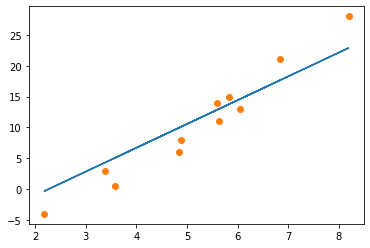

In [58]:
from matplotlib import pyplot as plt
import numpy
%matplotlib inline
plt.plot(0.1 * t_u.numpy(), t_p.detach().numpy())
plt.plot(0.1 * t_u.numpy(), t_c.numpy(), 'o')

In [49]:
t_u.numpy()

array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4],
      dtype=float32)

In [51]:
t_p.detach().numpy()

array([ 6.379371 , 12.887556 , 13.628586 , 21.264425 , 13.01643  ,
       10.632244 ,  5.799434 ,  1.9009676, 10.471151 , 14.337399 ,
       16.914898 ], dtype=float32)

构建一个卷积神经网络，用于做手写数字识别
首先导入必要的包

In [60]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
torch.manual_seed(1)

定义一些超参数

In [69]:
n_epochs = 10  # 迭代次数
batch_size = 64  # 小批随机下降的batch大小
learning_rate = 1e-3
download_MNIST = True

从torchvision.datasets加载数据集

In [64]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=download_MNIST)

100.1%

Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw


113.5%

Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw


100.4%

Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw


180.4%

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw
Processing...
Done!


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


torch.Size([60000, 28, 28])
torch.Size([60000])


<function matplotlib.pyplot.show(*args, **kw)>

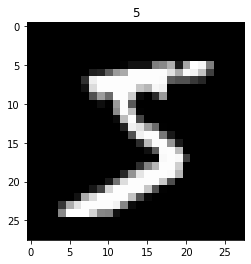

In [67]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show

In [73]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

In [74]:
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.test_labels[:2000]

C:\software\anoconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\software\anoconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [76]:
class CNN(nn.Module):
    # 初始化网络，配置网络参数
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x


In [77]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [78]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss()

In [80]:
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization, if not there')

def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9))
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.title('visualize last layer')
plt.ion()

epoch:  0  train loss:    2  test accuracy: 0.25
epoch:  0  train loss:    0  test accuracy: 0.88
epoch:  0  train loss:    0  test accuracy: 0.93
epoch:  0  train loss:    0  test accuracy: 0.95
epoch:  0  train loss:    0  test accuracy: 0.96
epoch:  0  train loss:    0  test accuracy: 0.97
epoch:  0  train loss:    0  test accuracy: 0.97
epoch:  0  train loss:    0  test accuracy: 0.98
epoch:  0  train loss:    0  test accuracy: 0.97
epoch:  0  train loss:    0  test accuracy: 0.97
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  1  train loss:    0  test accuracy: 0.97
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  1  train loss:    0  test accuracy: 0.98
epoch:  2  train los

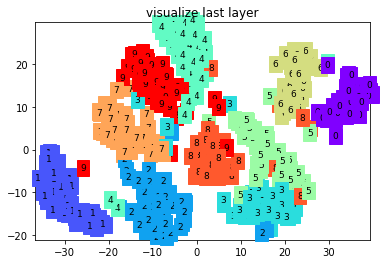

In [88]:
for epoch in range(n_epochs):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)  # batch x
        b_y = Variable(y)  # batch y
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('epoch: ', epoch, ' train loss: %4.f' % loss.data, ' test accuracy: %.2f' % accuracy )
            if HAS_SK:
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()
        

In [89]:
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
